In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import pandas as pd
import sympy as sym
from IPython.display import display, Math

# Inverse order
Starting from coupling coefficients to FSR/FWHM get

## Parameters

In [8]:
points = 200 #Graph points

lmbd = np.linspace(1.5e-6,1.6e-6,points)
lmbdC = (lmbd[0] + lmbd[-1])/2
L = 18.85e-6 + 8.8e-6 + 3e-6
a = 1
ng = 4.05292
neff = 2.4456

r = 0.9 # for All-pass
r1 = np.sqrt(0.9) # for Add-drop
r2 = np.sqrt(0.9) # for Add-drop

beta = neff*2*np.pi/lmbd
phi = beta*L # Single-pass phase shift
modPhi = 2*( (phi)/(2*np.pi) - np.floor(phi[points-1]/(2*np.pi) + 1) ) # Modulating single-pass phase shift by pi

display(Math('L = %5.4f~um' %(L*10**6)))

<IPython.core.display.Math object>

## All-pass ring resonator

### Transmission on pass port

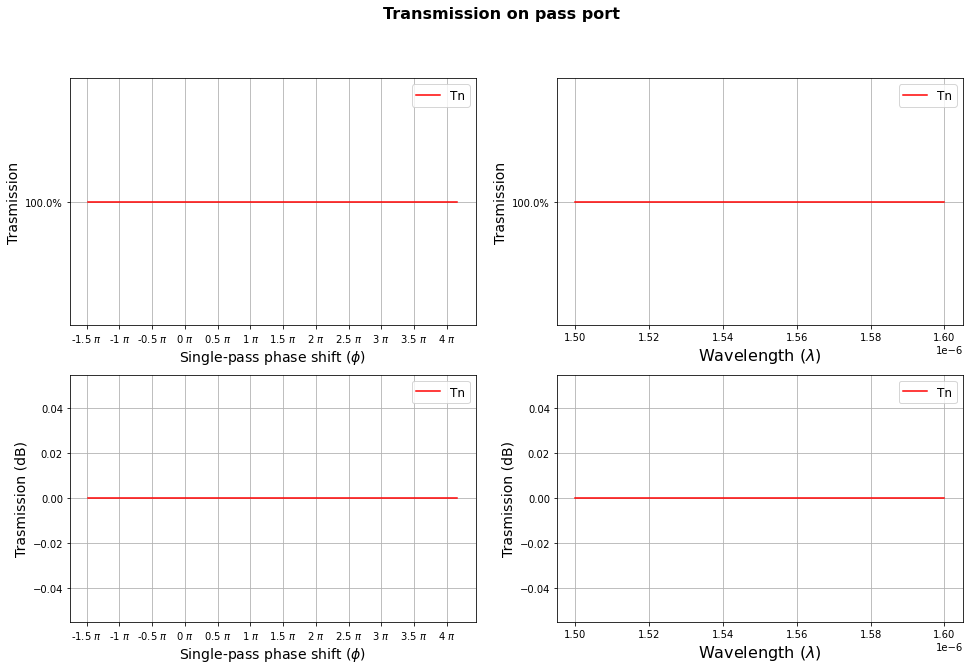

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
Tn = (a**2 - 2*r*a*np.cos(phi) + r**2)/(1 - 2*r*a*np.cos(phi) + (a*r)**2)
dbTn = 10*np.log(Tn)

figure,ax=plt.subplots(2, 2,figsize=(16,10))
figure.suptitle('Transmission on pass port',fontsize=16, fontweight="bold")

ax[0][0].plot(modPhi, Tn, 'r', label='Tn')
ax[0][0].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax[0][0].xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax[0][0].yaxis.set_major_formatter(tck.PercentFormatter(xmax=1))
ax[0][0].yaxis.set_major_locator(tck.MultipleLocator(base=0.1))
ax[0][0].set_xlabel(r'Single-pass phase shift ($\phi$)', fontsize=14)
ax[0][0].set_ylabel(r'Trasmission', fontsize=14)
ax[0][0].grid(True)
ax[0][0].legend(fontsize=12)

ax[0][1].plot(lmbd, Tn, 'r', label='Tn')
ax[0][1].grid(True)
ax[0][1].legend(fontsize=12)
ax[0][1].set_xlabel(r'Wavelength ($\lambda$)', fontsize=16)
ax[0][1].set_ylabel(r'Trasmission', fontsize=14)
ax[0][1].yaxis.set_major_formatter(tck.PercentFormatter(xmax=1))
ax[0][1].yaxis.set_major_locator(tck.MultipleLocator(base=0.1))

ax[1][0].plot(modPhi, dbTn, 'r', label='Tn')
ax[1][0].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax[1][0].xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax[1][0].set_xlabel(r'Single-pass phase shift ($\phi$)', fontsize=14)
ax[1][0].set_ylabel(r'Trasmission (dB)', fontsize=14)
ax[1][0].grid(True)
ax[1][0].legend(fontsize=12)

ax[1][1].plot(lmbd, dbTn, 'r', label='Tn')
ax[1][1].grid(True)
ax[1][1].legend(fontsize=12)
ax[1][1].set_xlabel(r'Wavelength ($\lambda$)', fontsize=16)
ax[1][1].set_ylabel(r'Trasmission (dB)', fontsize=14)
plt.show()

fsr = lmbdC**2/(ng*L)
fwhm = ((1-r*a)*lmbdC**2)/(np.pi * ng*L* np.sqrt(r*a))
display(Math('FSR_{~on~%5.2f~nm} = %5.4f~nm' %(lmbdC*10**9 , fsr*10**9)))
display(Math('FWHM_{~on~%5.2f~nm} = %5.4f~nm' %(lmbdC*10**9 , fwhm*10**9)))

### Effective phase delay sweep

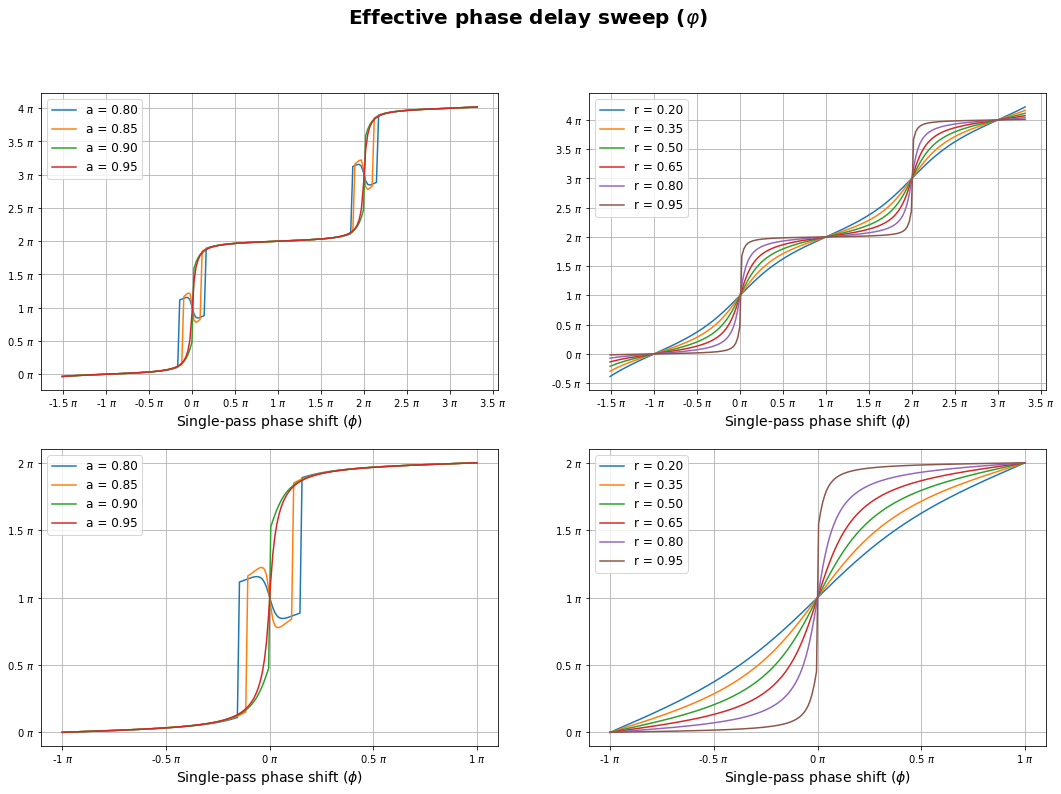

In [11]:
aSweep = np.linspace(0.8,0.95,4)
rSweep = np.linspace(0.2,0.95,6)
minorPhi = np.linspace(-np.pi, np.pi, points)

figure,ax=plt.subplots(2,2,figsize=(18,12))
figure.suptitle(r'Effective phase delay sweep ($\varphi$)',fontsize=20, fontweight="bold")

for i in aSweep:
    A = i
    pShift = np.pi + phi + np.arctan(r*np.sin(phi)/(A-r*np.cos(phi))) + np.arctan(r*A*np.sin(phi)/(1-r*A*np.cos(phi)))
    modPShift = 2*( (pShift)/(2*np.pi) - np.floor(pShift[points-1]/(2*np.pi) + 1) )
    ax[0][0].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax[0][0].xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
    ax[0][0].yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax[0][0].yaxis.set_major_locator(tck.MultipleLocator(base=0.5))

    labelstr = 'a = ' + "{:.2f}".format(i)
    ax[0][0].plot(modPhi, modPShift, label=labelstr)
ax[0][0].legend(fontsize=12)
ax[0][0].set_xlabel(r'Single-pass phase shift ($\phi$)', fontsize=14)
ax[0][0].grid(True)

for i in rSweep:
    R = i
    pShift = np.pi + phi + np.arctan(R*np.sin(phi)/(A-R*np.cos(phi))) + np.arctan(R*A*np.sin(phi)/(1-R*A*np.cos(phi)))
    modPShift = 2*( (pShift)/(2*np.pi) - np.floor(pShift[points-1]/(2*np.pi) + 1) )
    ax[0][1].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax[0][1].xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
    ax[0][1].yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax[0][1].yaxis.set_major_locator(tck.MultipleLocator(base=0.5))

    labelstr = 'r = ' + "{:.2f}".format(i)
    ax[0][1].plot(modPhi, modPShift, label=labelstr)
ax[0][1].legend(fontsize=12)
ax[0][1].set_xlabel(r'Single-pass phase shift ($\phi$)', fontsize=14)
ax[0][1].grid(True)

for i in aSweep:
    A = i
    pShift = np.pi + minorPhi + np.arctan(r*np.sin(minorPhi)/(A-r*np.cos(minorPhi))) + np.arctan(r*A*np.sin(minorPhi)/(1-r*A*np.cos(minorPhi)))
    modPShift = (pShift)/(np.pi) 
    ax[1][0].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax[1][0].xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
    ax[1][0].yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax[1][0].yaxis.set_major_locator(tck.MultipleLocator(base=0.5))

    labelstr = 'a = ' + "{:.2f}".format(i)
    ax[1][0].plot(minorPhi/(np.pi), modPShift, label=labelstr)
ax[1][0].legend(fontsize=12)
ax[1][0].set_xlabel(r'Single-pass phase shift ($\phi$)', fontsize=14)
ax[1][0].grid(True)

for i in rSweep:
    R = i
    pShift = np.pi + minorPhi + np.arctan(R*np.sin(minorPhi)/(A-R*np.cos(minorPhi))) + np.arctan(R*A*np.sin(minorPhi)/(1-R*A*np.cos(minorPhi)))
    modPShift = (pShift)/(np.pi) 
    ax[1][1].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax[1][1].xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
    ax[1][1].yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax[1][1].yaxis.set_major_locator(tck.MultipleLocator(base=0.5))

    labelstr = 'r = ' + "{:.2f}".format(i)
    ax[1][1].plot(minorPhi/(np.pi), modPShift, label=labelstr)
ax[1][1].legend(fontsize=12)
ax[1][1].set_xlabel(r'Single-pass phase shift ($\phi$)', fontsize=14)
ax[1][1].grid(True)

## Add-drop ring resonator

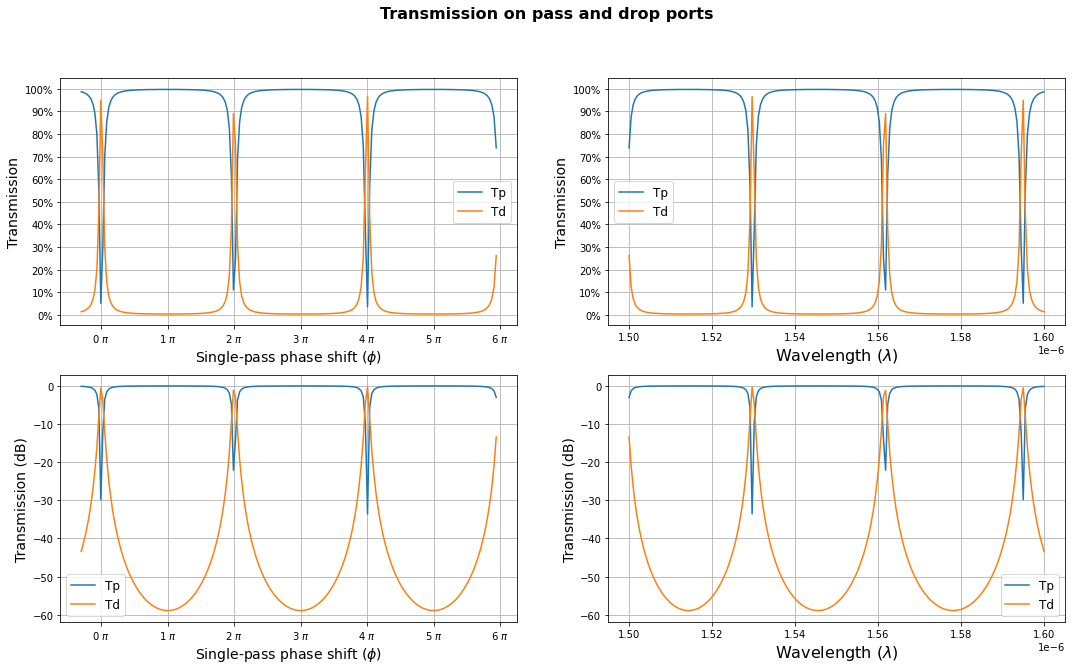

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
Tp = (r2**2 * a**2 - 2*r1*r2*a*np.cos(phi) + r1**2)/(1 - 2*r1*r2*a*np.cos(phi) + (a*r1*r2)**2)
Td = ((1-r1**2)*(1-r2**2)*a)/(1 - 2*r1*r2*a*np.cos(phi) + (r1*r2*a)**2)
dbTp = 10*np.log(Tp)
dbTd = 10*np.log(Td)

figure,ax=plt.subplots(2, 2,figsize=(18,10))
figure.suptitle('Transmission on pass and drop ports',fontsize=16, fontweight="bold")

ax[0][0].plot(modPhi, Tp, label='Tp')
ax[0][0].plot(modPhi, Td, label='Td')
ax[0][0].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax[0][0].xaxis.set_major_locator(tck.MultipleLocator(base=1))
ax[0][0].yaxis.set_major_formatter(tck.PercentFormatter(xmax=1))
ax[0][0].yaxis.set_major_locator(tck.MultipleLocator(base=0.1))
ax[0][0].grid(True)
ax[0][0].legend(fontsize=12)
ax[0][0].set_xlabel(r'Single-pass phase shift ($\phi$)', fontsize=14)
ax[0][0].set_ylabel(r'Transmission', fontsize=14)

ax[0][1].plot(lmbd, Tp, label='Tp')
ax[0][1].plot(lmbd, Td, label='Td')
ax[0][1].grid(True)
ax[0][1].legend(fontsize=12)
ax[0][1].set_xlabel(r'Wavelength ($\lambda$)', fontsize=16)
ax[0][1].set_ylabel(r'Transmission', fontsize=14)
ax[0][1].yaxis.set_major_formatter(tck.PercentFormatter(xmax=1))
ax[0][1].yaxis.set_major_locator(tck.MultipleLocator(base=0.1))

ax[1][0].plot(modPhi, dbTp, label='Tp')
ax[1][0].plot(modPhi, dbTd, label='Td')
ax[1][0].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax[1][0].xaxis.set_major_locator(tck.MultipleLocator(base=1))
ax[1][0].grid(True)
ax[1][0].legend(fontsize=12)
ax[1][0].set_xlabel(r'Single-pass phase shift ($\phi$)', fontsize=14)
ax[1][0].set_ylabel(r'Transmission (dB)', fontsize=14)

ax[1][1].plot(lmbd, dbTp, label='Tp')
ax[1][1].plot(lmbd, dbTd, label='Td')
ax[1][1].grid(True)
ax[1][1].legend(fontsize=12)
ax[1][1].set_xlabel(r'Wavelength ($\lambda$)', fontsize=16)
ax[1][1].set_ylabel(r'Transmission (dB)', fontsize=14)
plt.show()

fsr = lmbdC**2/(ng*L)
fwhm = ((1-r1*r2*a)*lmbdC**2)/(np.pi * ng*L* np.sqrt(r1*r2*a))
display(Math('FSR_{~on~%5.2f~nm} = %5.4f~nm' %(lmbdC*10**9 , fsr*10**9)))
display(Math('FWHM_{~on~%5.2f~nm} = %5.4f~nm' %(lmbdC*10**9 , fwhm*10**9)))

# Direct order
Starting with FSR/FWHM to coupling coefficients get

## Parameters

In [13]:
fsr = 25e-9
fwhm = 0.83e-9
ng = 4.05292
neff = 2.4456
a = 1
lmbdC = 1550e-9

Len = lmbdC**2/(ng*fsr)
x = fwhm*np.pi*ng*Len/(lmbdC**2)

sym.init_printing()
r = sym.symbols('r')
func = sym.Eq((1-r)/(r**(1/2)),x)
f = sym.solve([func],(r))
r = f[0][0]

k = 1-r
r1 = r**(1/2)
r2 = r**(1/2)

display(Math('L = %5.4f~um' %(L*10**6)))
display(Math('r^{2} = %5.4f' %(r)))
display(Math('k^{2} = %5.4f' %(k)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Quadratic method by Moisés

In [14]:
lambd = 1550e-9
FSR = 25e-6
FWHM = 0.83e-9
ng = 4.05292
L = 23.7113e-6
b = (FWHM*np.pi*ng*L)**2

r_square = np.roots([lambd**4,-(2*lambd**4 + b),lambd**4])
print(f'r^2 = {r_square}')

r^2 = [1.10988195 0.90099672]
